In [1]:
from matplotlib.pyplot import subplots, show, imshow
from matplotlib.image import imread
from numpy.random import seed as np_seed
from lqid import img2matrix, quickshow, random_blur, random_band, random_noise, random_exposure, random_glare, random_dark, random_constant, KERNEL_LAPLACIAN_1, KERNEL_LAPLACIAN_2, KERNEL_SOBEL_1, KERNEL_SOBEL_2, conv, fftifft

np_seed(1102)

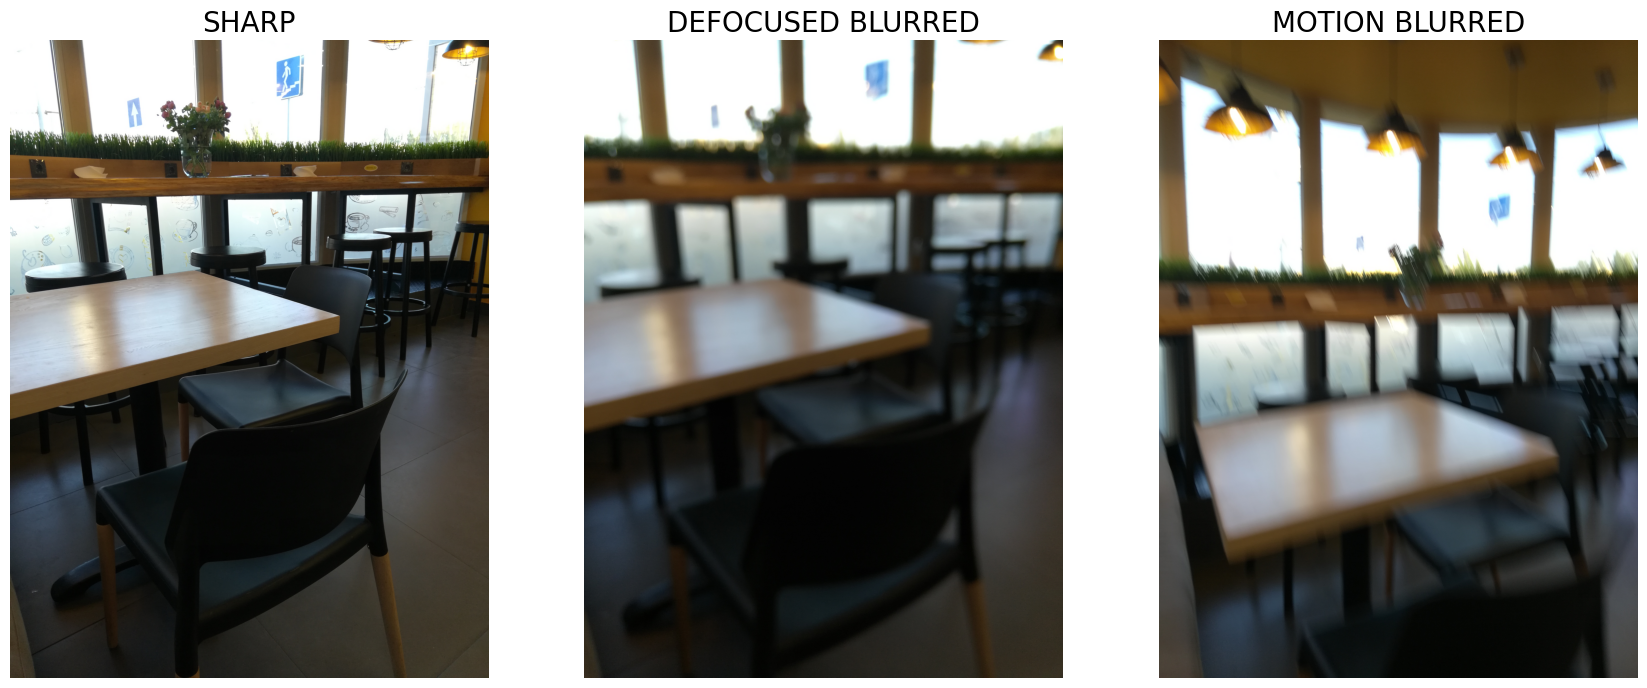

In [2]:
fig, axes = subplots(nrows=1, ncols=3, figsize=(21, 12))
axes[0].imshow(imread("dataset_dms/sharp/93_HONOR-7X_S.jpg"))
axes[0].set_title("SHARP")
axes[0].title.set_fontsize(20)
axes[0].axis("off")

axes[1].imshow(imread("dataset_dms/defocused_blurred/93_HONOR-7X_F.jpg"))
axes[1].set_title("DEFOCUSED BLURRED")
axes[1].title.set_fontsize(20)
axes[1].axis("off")

axes[2].imshow(imread("dataset_dms/motion_blurred/93_HONOR-7X_M.jpg"))
axes[2].set_title("MOTION BLURRED")
axes[2].title.set_fontsize(20)
axes[2].axis("off")

show()

fig.savefig("dataset_unsplash/93_HONOR-7X.png", bbox_inches="tight", dpi=150, format="png")

In [3]:
dict_transform = {
    "SHARP": lambda x: x,
    "BLUR": random_blur,
    "BAND": random_band,
    "NOISE": random_noise,
    "EXPOSURE": random_exposure,
    "GLARE": random_glare,
    "DARK": random_dark,
    "CONSTANT": random_constant,
}

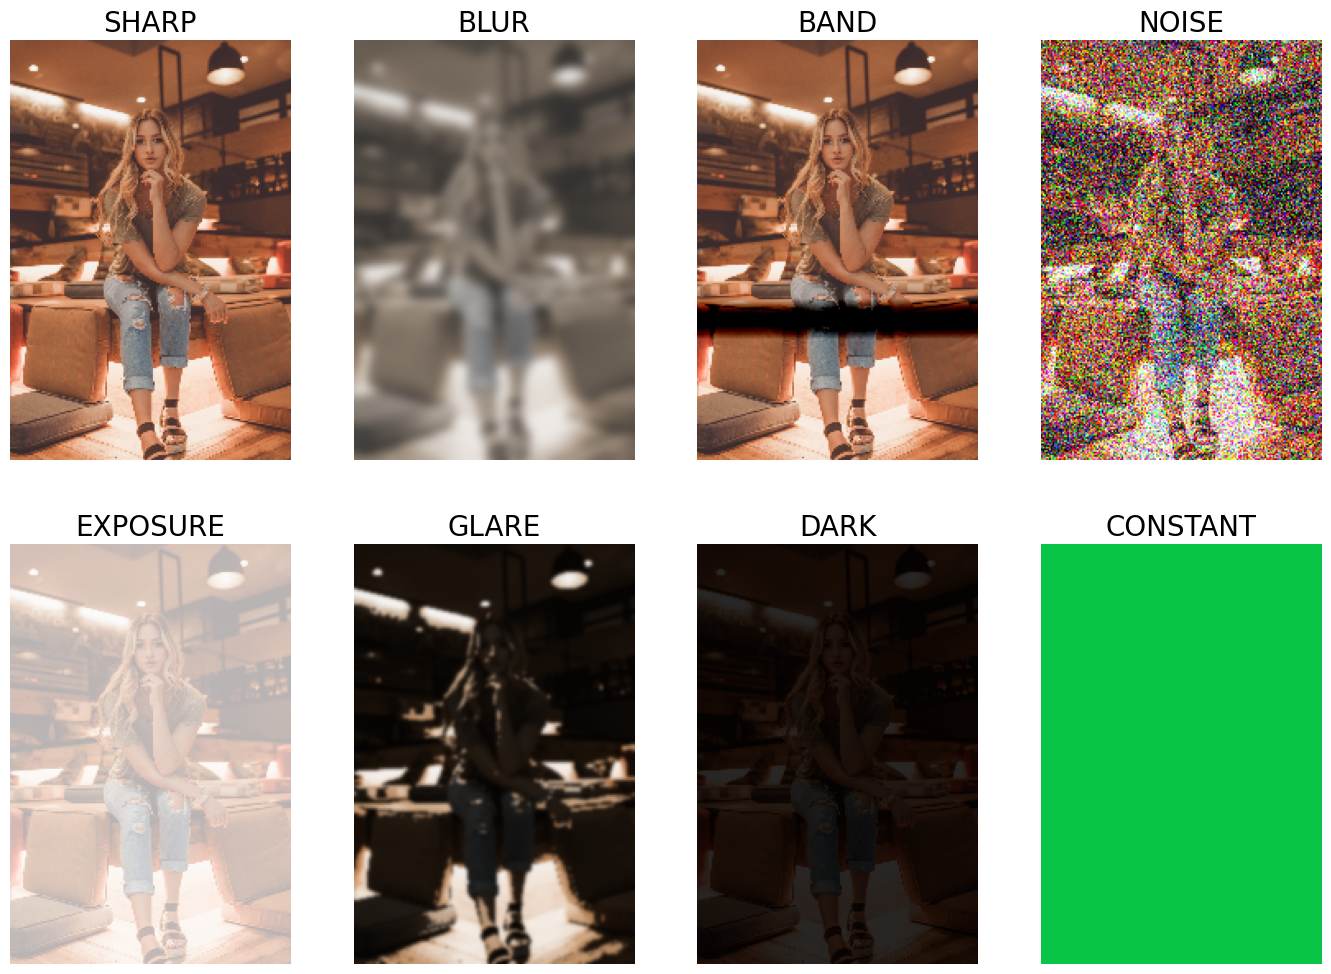

In [4]:
path_img = "dataset_unsplash/clay-banks-6qVkUPawED0-unsplash.jpg"
dict_img = img2matrix(path_img, l=214, h=320)
matrix = dict_img["rgb"]

fig, axes = subplots(nrows=2, ncols=4, figsize=(17, 12))

for i, k in enumerate(dict_transform.keys()):
    axes.flat[i].set_title(k)
    axes.flat[i].title.set_fontsize(20)
    axes.flat[i].imshow(dict_transform[k](matrix))
    axes.flat[i].axis("off")
show()
fig.savefig("dataset_unsplash/clay-banks-6qVkUPawED0-unsplash_lqi_examples.png", bbox_inches="tight", dpi=900, format="png")

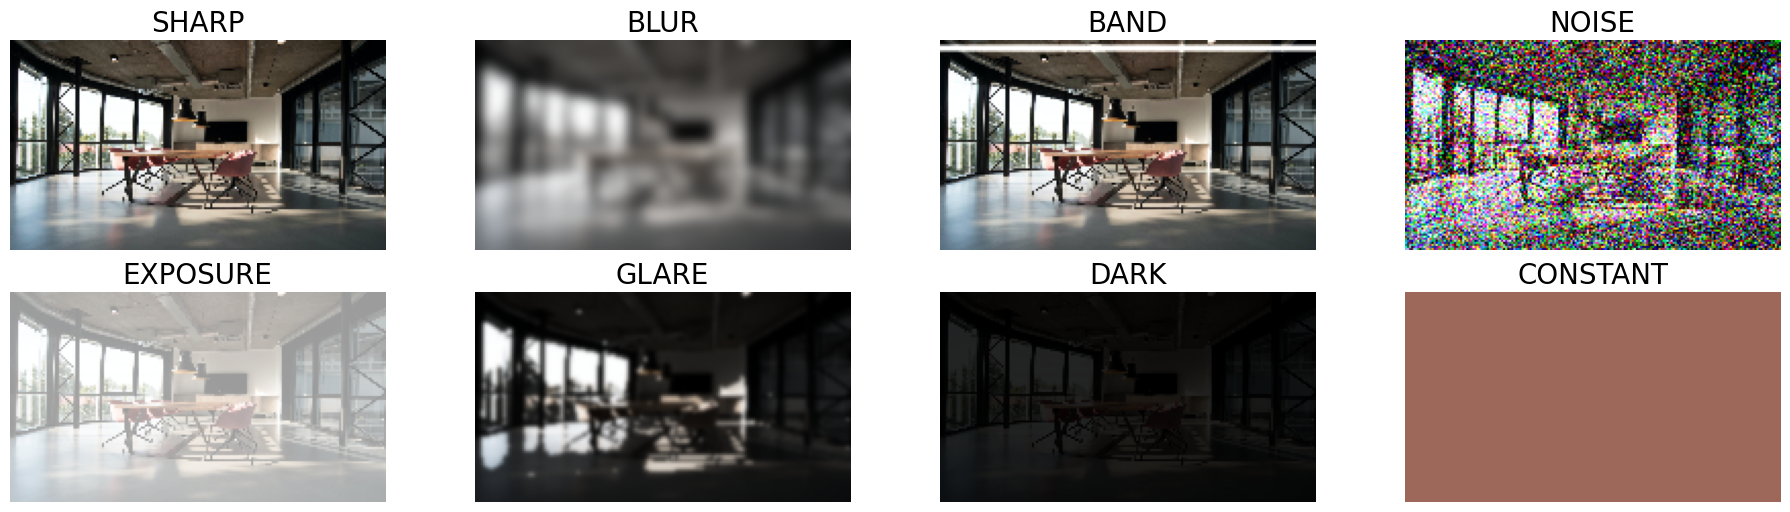

In [5]:
path_img = "dataset_unsplash/nastuh-abootalebi-eHD8Y1Znfpk-unsplash.jpg"
dict_img = img2matrix(path_img, l=230, h=128)
matrix = dict_img["rgb"]

fig, axes = subplots(nrows=2, ncols=4, figsize=(23, 6))

for i, k in enumerate(dict_transform.keys()):
    axes.flat[i].set_title(k)
    axes.flat[i].title.set_fontsize(20)
    axes.flat[i].imshow(dict_transform[k](matrix))
    axes.flat[i].axis("off")
show()
fig.savefig("dataset_unsplash/nastuh-abootalebi-eHD8Y1Znfpk-unsplash_lqi_examples.png", bbox_inches="tight", dpi=900, format="png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


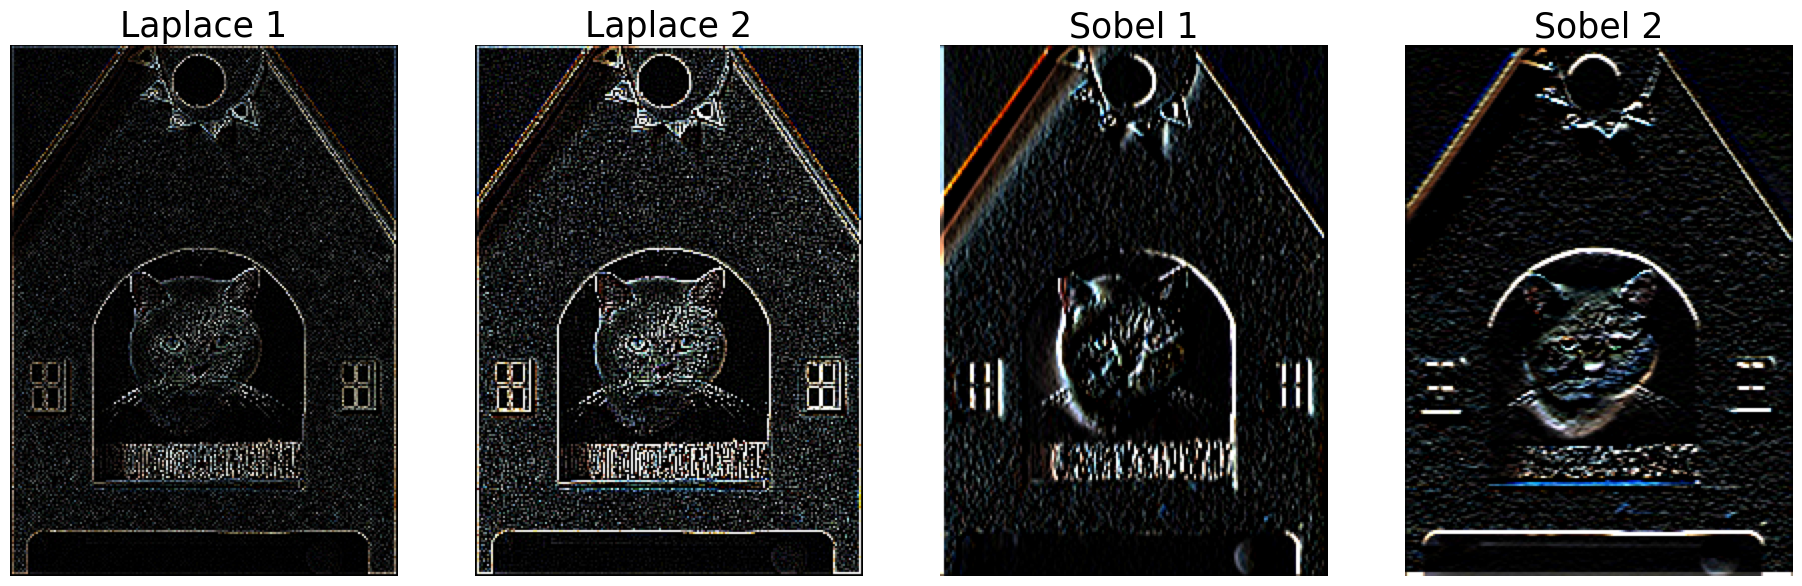

In [6]:
path_img = "dataset_unsplash/marthijn-brinks-XiHyfOKmDIs-unsplash.jpg"
dict_img = img2matrix(path_img, l=240, h=330)
matrix = dict_img["rgb"]

fig, axes = subplots(nrows=1, ncols=4, figsize=(23, 10))
dict_kernels = {
            "Laplace 1": KERNEL_LAPLACIAN_1, 
            "Laplace 2": KERNEL_LAPLACIAN_2, 
            "Sobel 1": KERNEL_SOBEL_1, 
            "Sobel 2": KERNEL_SOBEL_2
        }

for i, k in enumerate(dict_kernels.keys()):
    axes.flat[i].set_title(k)
    axes.flat[i].title.set_fontsize(25)
    axes.flat[i].imshow(conv(matrix, dict_kernels[k]))
    axes.flat[i].axis("off")
show()
fig.savefig("dataset_unsplash/marthijn-brinks-XiHyfOKmDIs-unsplash_conv.png", bbox_inches="tight", dpi=900, format="png")

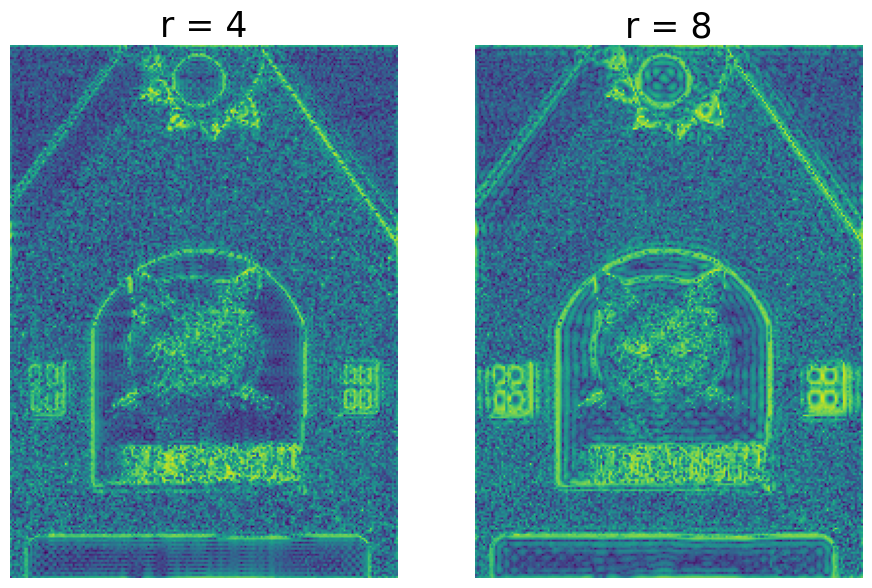

In [7]:
path_img = "dataset_unsplash/marthijn-brinks-XiHyfOKmDIs-unsplash.jpg"
dict_img = img2matrix(path_img, l=240, h=330)
matrix = dict_img["gray"]

fig, axes = subplots(nrows=1, ncols=2, figsize=(11, 10))

for i, k in enumerate([4, 8]):
    t_matrix = fftifft(matrix, k)
    axes.flat[i].set_title("r = "+str(k))
    axes.flat[i].title.set_fontsize(25)
    axes.flat[i].imshow(t_matrix)
    axes.flat[i].axis("off")
show()
fig.savefig("dataset_unsplash/marthijn-brinks-XiHyfOKmDIs-unsplash_fft.png", bbox_inches="tight", dpi=900, format="png")

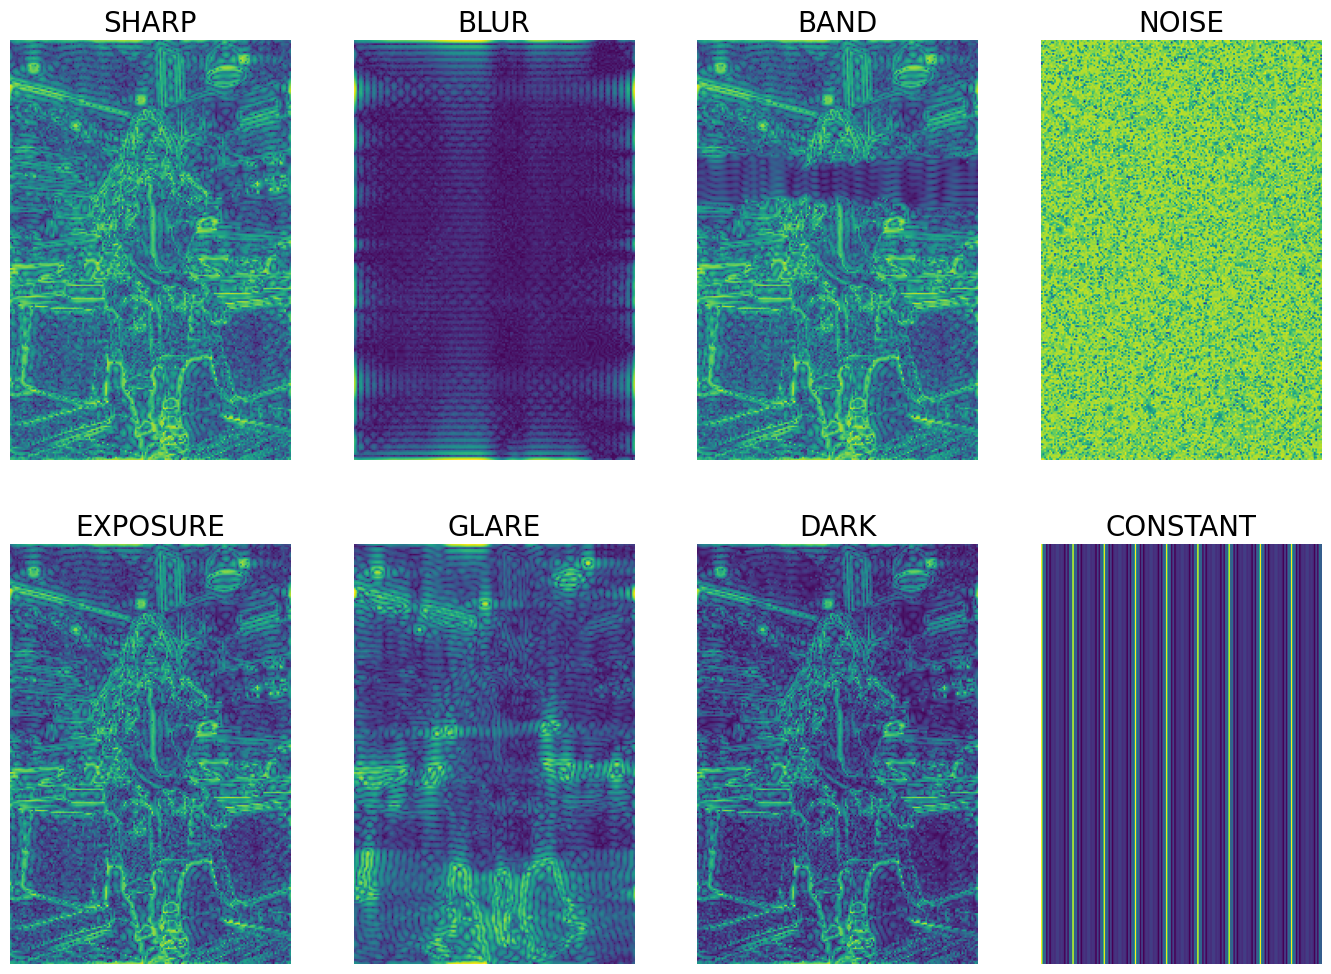

In [9]:
path_img = "dataset_unsplash/clay-banks-6qVkUPawED0-unsplash.jpg"
dict_img = img2matrix(path_img, l=214, h=320)
matrix = dict_img["gray"]

fig, axes = subplots(nrows=2, ncols=4, figsize=(17, 12))

for i, k in enumerate(dict_transform.keys()):
    t_matrix = fftifft(dict_transform[k](matrix), r=8)
    axes.flat[i].set_title(k)
    axes.flat[i].title.set_fontsize(20)
    axes.flat[i].imshow(t_matrix)
    axes.flat[i].axis("off")
show()
fig.savefig("dataset_unsplash/clay-banks-6qVkUPawED0-unsplash_fft.png", bbox_inches="tight", dpi=900, format="png")